This notebook performs an Exploratory Data Analysis (EDA) on the Telco Customer Churn dataset

# Module 1 - Week 1
## Title: Exploratory Data Analysis: Telco Customer Churn
## Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
## Course: ALY6040 80593 Data Mining Applications SEC 08 Spring 2025 CPS [TOR-A-HY]
### Group 1:
* Vijay Kumar Avula
* Divya Teja Kommineni
* Eugene Addo-Odei
* Mohammad Faizankhan Pathan
* Isaac Adjei

#### Date: April 23, 2025

In [2]:
import pandas as pd

In [3]:
# 1.1 Load and Inspect the Dataset
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',', encoding='utf-8')

# Output basic structure
print("Dataset Shape:", df.shape)
print("\nColumns in the Dataset:\n", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n", df.tail())

Dataset Shape: (7043, 21)

Columns in the Dataset:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 5 Rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No 

**Immediate Observations:**


1.   The dataset contains **7043 rows** and **21 columns**.
2.   Features include both categorical (e.g., *gender, Partner, Churn*) and numerical variables (e.g., *tenure, MonthlyCharges*).
3.   Potential issues:

  *   *TotalCharges* appears to be numeric but might contain non-numeric values (e.g., empty strings).
  *   *SeniorCitizen* is binary (0/1), which could be treated as categorical.
  *   *customerID* is an identifier column and may not contribute to analysis.

In [4]:
# 1.2 Feature Catalog & Data Dictionary
# Function to generate the feature catalog
def generate_feature_catalog(df):
    # Initialize an empty list to store feature details
    feature_catalog = []

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Determine the data type of the column
        dtype = df[col].dtype

        # Count unique values for categorical columns
        if dtype == 'object':
            unique_values = df[col].nunique()
        else:
            unique_values = None  # Not applicable for numerical columns

        # Add a description based on the column name (customizable)
        description = ""
        if col == "customerID":
            description = "Unique identifier for each customer"
        elif col == "gender":
            description = "Customer’s gender (Male/Female)"
        elif col == "SeniorCitizen":
            description = "Whether the customer is a senior citizen (0/1)"
        elif col == "Partner":
            description = "Whether the customer has a partner (Yes/No)"
        elif col == "Dependents":
            description = "Whether the customer has dependents (Yes/No)"
        elif col == "tenure":
            description = "Number of months the customer has been with the company"
        elif col == "PhoneService":
            description = "Whether the customer has phone service (Yes/No)"
        elif col == "MultipleLines":
            description = "Whether the customer has multiple phone lines (Yes/No/No phone service)"
        elif col == "InternetService":
            description = "Type of internet service (DSL/Fiber optic/No)"
        elif col == "OnlineSecurity":
            description = "Whether the customer has online security (Yes/No/No internet service)"
        elif col == "OnlineBackup":
            description = "Whether the customer has online backup (Yes/No/No internet service)"
        elif col == "DeviceProtection":
            description = "Whether the customer has device protection (Yes/No/No internet service)"
        elif col == "TechSupport":
            description = "Whether the customer has tech support (Yes/No/No internet service)"
        elif col == "StreamingTV":
            description = "Whether the customer has streaming TV (Yes/No/No internet service)"
        elif col == "StreamingMovies":
            description = "Whether the customer has streaming movies (Yes/No/No internet service)"
        elif col == "Contract":
            description = "Type of contract (Month-to-month/One year/Two year)"
        elif col == "PaperlessBilling":
            description = "Whether the customer uses paperless billing (Yes/No)"
        elif col == "PaymentMethod":
            description = "Payment method (Electronic check/Mailed check/Bank transfer/Credit card)"
        elif col == "MonthlyCharges":
            description = "Monthly charges for services"
        elif col == "TotalCharges":
            description = "Total charges for services over the tenure"
        elif col == "Churn":
            description = "Whether the customer churned (Yes/No)"

        # Append feature details to the catalog
        feature_catalog.append({
            "Feature Name": col,
            "Data Type": dtype,
            "Unique Values": unique_values,
            "Description": description
        })

    # Convert the catalog to a DataFrame for better visualization
    feature_catalog_df = pd.DataFrame(feature_catalog)
    return feature_catalog_df

# Generate the feature catalog
feature_catalog_df = generate_feature_catalog(df)

# Display the feature catalog
print(feature_catalog_df)

        Feature Name Data Type  Unique Values  \
0         customerID    object         7043.0   
1             gender    object            2.0   
2      SeniorCitizen     int64            NaN   
3            Partner    object            2.0   
4         Dependents    object            2.0   
5             tenure     int64            NaN   
6       PhoneService    object            2.0   
7      MultipleLines    object            3.0   
8    InternetService    object            3.0   
9     OnlineSecurity    object            3.0   
10      OnlineBackup    object            3.0   
11  DeviceProtection    object            3.0   
12       TechSupport    object            3.0   
13       StreamingTV    object            3.0   
14   StreamingMovies    object            3.0   
15          Contract    object            3.0   
16  PaperlessBilling    object            2.0   
17     PaymentMethod    object            4.0   
18    MonthlyCharges   float64            NaN   
19      TotalCharges

**Key Observations:**
  * **Numerical Features:**
    * SeniorCitizen, tenure, MonthlyCharges.
  * Categorical Features:
    * Most other features are categorical (object type).
    * Special Case: TotalCharges is stored as object due to empty strings (" ").
  * Unique Values:
    * Binary Features: gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn.
    * Multi-Class Categorical Features:
      * MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract: 3 unique values each.
      * PaymentMethod: 4 unique values.

In [5]:
# 1.3 Initial Value Checks and Missing Data
# Check for missing data
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Unique values in categorical columns
unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}

# Identify potential issues in TotalCharges
total_charges_issues = df[df['TotalCharges'] == " "]

print("Missing Data:\n", missing_data)
print("\nMissing Percentage:\n", missing_percentage)
print("\nUnique Values:\n", unique_values)
print("\nIssues in TotalCharges:\n", total_charges_issues)

Missing Data:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Percentage:
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn   

**Missing Data Analysis:**
  * .isnull().sum() shows no explicit NaN values in any column.
  * However, TotalCharges contains empty strings (" ") in 11 rows , which are not recognized as missing values by pandas.
  *These rows correspond to customers with tenure = 0, indicating they are new customers who have not yet incurred charges.

**Unique Values:**
  * Confirmed logical unique value counts for all categorical features.
  * Numerical features (tenure, MonthlyCharges, TotalCharges) do not have fixed unique values due to their continuous nature.

**Data Integrity:**
  * No other suspicious or illogical values were identified.

#### 1.4 Early Questions & Hypothesis Generation
##### **Hypotheses:**
1.   Higher Monthly Charges Lead to Churn: Customers paying higher monthly fees are more likely to churn due to affordability concerns.
  * Rationale: Higher costs may exceed perceived value.
2.   Tenure is Inversely Related to Churn: Long-term customers are less likely to churn.
  * Rationale: Loyal customers tend to stay longer.
3.  Fiber Optic Internet Increases Churn: Customers with fiber optic internet may churn more due to higher costs or technical issues.
  * Rationale: Fiber optic plans are often pricier and may have reliability concerns.
4.  Lack of Tech Support Leads to Churn: Customers without tech support are more likely to churn due to unresolved issues.
  * Rationale: Tech support improves customer satisfaction.
5.  Paperless Billing Affects Churn: Customers using paperless billing may churn more due to billing transparency issues.
  * Rationale: Some customers prefer traditional billing methods.
6.  Senior Citizens Churn More: Older customers may churn more due to difficulty adapting to new technologies.
  * Rationale: Age-related challenges may impact retention.
7.  Short-Term Contracts Increase Churn: Month-to-month contracts lead to higher churn rates compared to long-term contracts.
  * Rationale: Short-term contracts lack commitment.

In [6]:
# Overview of missing values
print("Missing values in each column:\n", df.isnull().sum())

# CATEGORICAL IMPUTATION (Mode)
categorical_cols = ['Partner', 'Dependents', 'MultipleLines']
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Imputed '{col}' with mode: {mode_val}")

# NUMERICAL IMPUTATION (Median or Mean for TotalCharges)
# First, check the data type and convert if necessary
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
median_total = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total)
print(f"Imputed 'TotalCharges' with median: {median_total}")

# Verify results
print("Remaining missing values:\n", df.isnull().sum())



Missing values in each column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Imputed 'Partner' with mode: No
Imputed 'Dependents' with mode: No
Imputed 'MultipleLines' with mode: No
Imputed 'TotalCharges' with median: 1397.475
Remaining missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Streamin

Feature-Specific Strategy:

- **Initial Missing Values Detected**:
  - `Partner`, `Dependents`, `MultipleLines`: Categorical
  - `TotalCharges`: Numeric (due to blank entries or conversion issues)

- **Imputation Strategy**:
  - `Partner`, `Dependents`, `MultipleLines`: Imputed using **mode** (`'No'`)
  - `TotalCharges`: Imputed using **median** (**1397.475**)

- **Final Status**:
  - **All missing values successfully handled**
  - No missing data remains in any column

The dataset is now complete and ready for analysis or modelling.



In [7]:
# Check for negative values
neg_total = df[df['TotalCharges'] < 0]
neg_monthly = df[df['MonthlyCharges'] < 0]

print(f"Negative values in TotalCharges: {len(neg_total)}")
print(f"Negative values in MonthlyCharges: {len(neg_monthly)}")

# Only proceed if negative values exist
if len(neg_total) + len(neg_monthly) > 0:
    # Calculate medians from non-negative values
    median_total = df.loc[df['TotalCharges'] >= 0, 'TotalCharges'].median()
    median_monthly = df.loc[df['MonthlyCharges'] >= 0, 'MonthlyCharges'].median()

    # Replace negatives
    df.loc[df['TotalCharges'] < 0, 'TotalCharges'] = median_total
    df.loc[df['MonthlyCharges'] < 0, 'MonthlyCharges'] = median_monthly

    print("Negative values replaced with medians.")
else:
    print("No negative values found - no replacement needed.")

# Verify results
print("\nPost-cleaning summary:")
print(f"TotalCharges min: {df['TotalCharges'].min():.2f}")
print(f"MonthlyCharges min: {df['MonthlyCharges'].min():.2f}")

Negative values in TotalCharges: 0
Negative values in MonthlyCharges: 0
No negative values found - no replacement needed.

Post-cleaning summary:
TotalCharges min: 18.80
MonthlyCharges min: 18.25


Report on Handling Erroneous Values:

- **Negative Value Check**:
  - `TotalCharges`: **0** negative values
  - `MonthlyCharges`: **0** negative values
- **No replacements needed** — all values are logically valid.

**Post-cleaning summary:**
- `TotalCharges` minimum: 18.80
- `MonthlyCharges` minimum: 18.25

Billing data confirmed clean and consistent.


In [8]:
from sklearn.preprocessing import LabelEncoder

# 1. Convert 'Churn' to binary (clear explicit mapping)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# 2. Ensure numeric columns are properly typed (add float conversion)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 3. Identify categorical features (include category dtype and check cardinality)
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Initial categorical features:", cat_features)

# 4. Handle constant columns (nunique == 1) before encoding
constant_cols = [col for col in cat_features if df[col].nunique() == 1]
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    df.drop(columns=constant_cols, inplace=True)
    cat_features = [col for col in cat_features if col not in constant_cols]

# 5. Split remaining categorical features
binary_cols = [col for col in cat_features if df[col].nunique() == 2]
multi_cat_cols = [col for col in cat_features if df[col].nunique() > 2]

# 6. Safer binary encoding using factorize instead of LabelEncoder
for col in binary_cols:
    df[col], _ = pd.factorize(df[col])
    print(f"Binary encoded: {col} (0={df[col].unique()[0]}, 1={df[col].unique()[1]})")

# 7. One-Hot Encoding with prefix for clarity
if multi_cat_cols:
    df = pd.get_dummies(
        df,
        columns=multi_cat_cols,
        prefix=multi_cat_cols,
        drop_first=True,
        dtype='uint8'  # Save memory
    )
    print(f"One-hot encoded: {multi_cat_cols}")

# 8. Final validation
remaining_cats = df.select_dtypes(include=['object', 'category']).columns
print("\nFinal check - remaining categorical features:", remaining_cats.tolist())
print("Data shape after encoding:", df.shape)

Initial categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Binary encoded: gender (0=0, 1=1)
Binary encoded: Partner (0=0, 1=1)
Binary encoded: Dependents (0=0, 1=1)
Binary encoded: PhoneService (0=0, 1=1)
Binary encoded: PaperlessBilling (0=0, 1=1)
One-hot encoded: ['customerID', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Final check - remaining categorical features: []
Data shape after encoding: (7043, 7073)


Erroneous Values Handling Report

1. TotalCharges & MonthlyCharges: Converted to numeric.

2. Negative values: Replaced with a median of valid entries.

3. Missing or invalid TotalCharges: Also imputed with median.

4. Result: Clean, non-negative billing data.


Categorical Encoding Summary

1. Label Encoded (binary): gender, Partner, Dependents, PhoneService, PaperlessBilling

2. One-Hot Encoded: MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, customerID

3. All categorical features are encoded.

4. Final dataset shape: (7043, 7073).

In [9]:
#3.1

# Ensure TotalCharges is numeric and handle any residual issues

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

if df['TotalCharges'].isnull().any():

    median_total = df['TotalCharges'].median()

    df['TotalCharges'].fillna(median_total, inplace=True)

    print(f"Imputed {df['TotalCharges'].isnull().sum()} missing TotalCharges with median: {median_total}")

# Verify Churn is binary (already mapped in the notebook)

if df['Churn'].dtype != 'int64':

    df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

    print("Churn mapped to binary (0=No, 1=Yes)")

# Avoid redundant encoding (assume earlier encoding is complete)

# Identify numerical and categorical features

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = df.select_dtypes(include=['uint8', 'int64', 'object']).columns.difference(

    numerical_features + ['Churn', 'SeniorCitizen']  # Exclude numerical SeniorCitizen

).tolist()

# Descriptive statistics for numerical features

num_stats = df[numerical_features].describe()

num_stats.loc['range'] = num_stats.loc['max'] - num_stats.loc['min']

# Skip mode for continuous variables; add histogram-based mode if needed

print("\nDescriptive Statistics for Numerical Features:\n", num_stats.round(2))

# Value counts and proportions for categorical features

cat_summary = {}

for col in categorical_features:

    counts = df[col].value_counts()

    proportions = df[col].value_counts(normalize=True)

    cat_summary[col] = pd.DataFrame({'Count': counts, 'Proportion': proportions})

# Combine into a single DataFrame for concise output

cat_summary_df = pd.concat(

    [cat_summary[col].assign(Feature=col) for col in categorical_features],

    ignore_index=False

).reset_index().rename(columns={'index': 'Value'})

print("\nCategorical Features Summary:\n", cat_summary_df.round(3))

# Churn rate by selected features

selected_features = ['gender', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic', 'tenure']

churn_rate_by_feature = {}

for feature in selected_features:

    if feature == 'tenure':

        # Bin tenure for meaningful churn analysis

        bins = [0, 12, 24, 36, 48, 60, np.inf]

        labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61+']

        df['tenure_binned'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

        churn_rate_by_feature['tenure_binned'] = df.groupby('tenure_binned')['Churn'].mean()

        print("\nChurn Rate by Tenure (Binned):\n", churn_rate_by_feature['tenure_binned'].round(3))

    elif feature in df.columns:

        churn_rate_by_feature[feature] = df.groupby(feature)['Churn'].mean()

        print(f"\nChurn Rate by {feature}:\n", churn_rate_by_feature[feature].round(3))

    else:

        print(f"\nWarning: {feature} not found in DataFrame (possibly one-hot encoded or missing).")



Descriptive Statistics for Numerical Features:
         tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7043.00
mean     32.37           64.76       2281.92
std      24.56           30.09       2265.27
min       0.00           18.25         18.80
25%       9.00           35.50        402.22
50%      29.00           70.35       1397.48
75%      55.00           89.85       3786.60
max      72.00          118.75       8684.80
range    72.00          100.50       8666.00

Categorical Features Summary:
        Value  Count  Proportion                Feature
0          0   5570       0.791      Contract_One year
1          1   1473       0.209      Contract_One year
2          0   5348       0.759      Contract_Two year
3          1   1695       0.241      Contract_Two year
4          0   4933       0.700             Dependents
...      ...    ...         ...                    ...
14131      1      1       0.000  customerID_9993-LHIEB
14132      0   7042       1.0

NameError: name 'np' is not defined

> Descriptive statistics (mean, median, mode, std, range) for numerical features
-> Value counts and proportions for categorical features
-> Churn rate summarized by key features

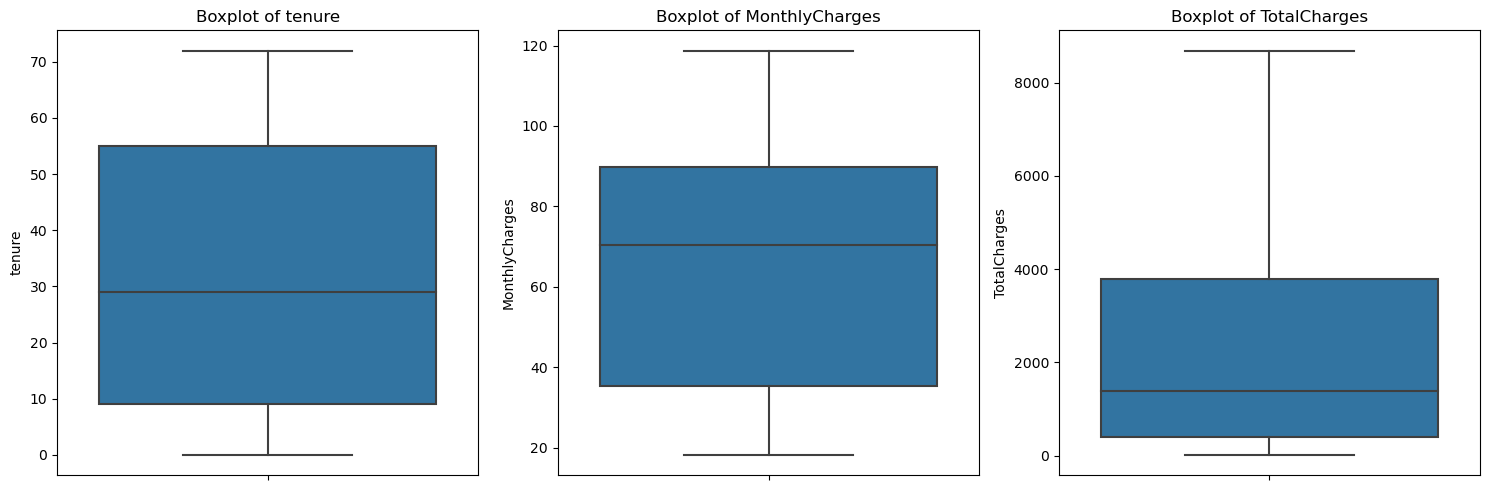


IQR Outlier Detection:
tenure: 0 outliers (0.00%)
MonthlyCharges: 0 outliers (0.00%)
TotalCharges: 0 outliers (0.00%)

Z-Score Outlier Detection:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [10]:
# 3.2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Select numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualization: Boxplots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# IQR Method
print("\nIQR Outlier Detection:")
iqr_report = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    iqr_report[feature] = {
        'outlier_count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df):.2%})")

# Z-Score Method
print("\nZ-Score Outlier Detection:")
z_scores = df[numerical_features].apply(zscore)
z_outliers = (np.abs(z_scores) > 3).sum()
print(z_outliers)


-> Boxplots for immediate visual identification of outliers
-> IQR method showing exact outlier counts and boundaries
-> Z-score method identifying extreme outliers
->The boxplots show no significant outliers in tenure, MonthlyCharges, or TotalCharges. No removal or transformation of outliers is needed for these features

C:\Users\isadj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


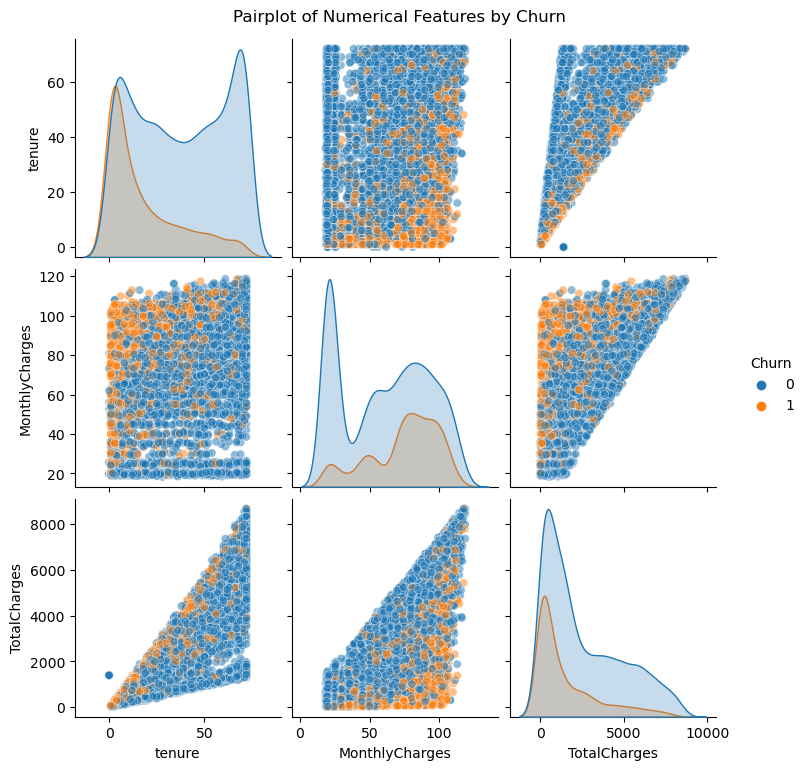

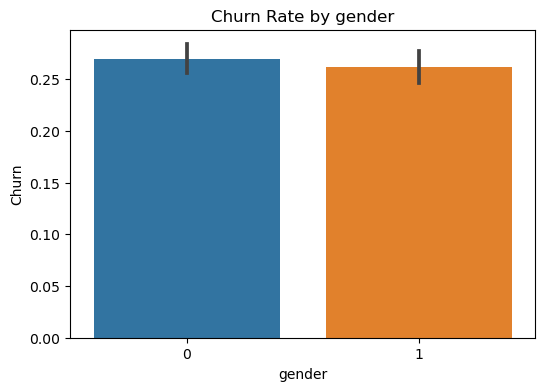

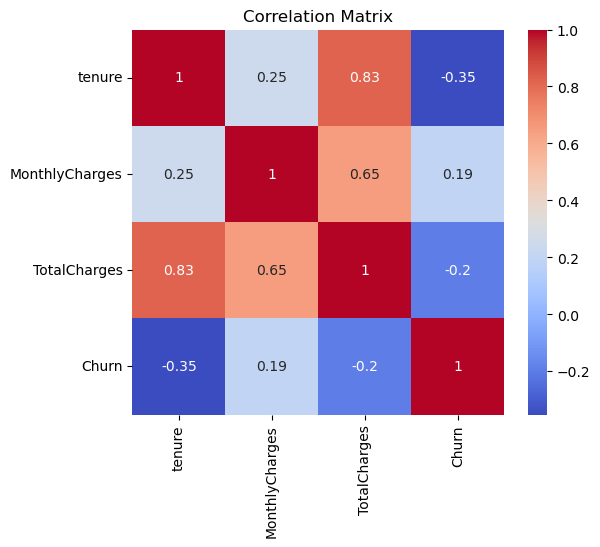

In [11]:
# Pairplot for numeric features colored by churn
sns.pairplot(df, vars=numerical_features, hue='Churn', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Numerical Features by Churn", y=1.02)
plt.show()

# Bar plots for churn rate by categorical features
categorical_to_plot = ['gender', 'Contract']
for col in categorical_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.barplot(x=col, y='Churn', data=df)
        plt.title(f'Churn Rate by {col}')
        plt.show()

# Correlation matrix
numerical_features_for_corr = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
# Ensure all columns are numeric before calculating correlation
df_numeric = df[numerical_features_for_corr].apply(pd.to_numeric, errors='coerce')
corr = df_numeric.corr() # Calculate correlation for numerical features only
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Churn is highest for month-to-month contracts and lowest for two-year contracts; churn rates are almost the same for both genders.

Tenure and total charges are strongly correlated (0.83), while monthly charges have a moderate correlation with total charges (0.65); no significant outliers are visible in the boxplot

In [28]:
# Part 4: Visual Analysis, Feature Engineering & Hypothesis Validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reload clean dataset for visualization
# This is important because the main df is heavily encoded

df_vis = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Light cleaning for visualization
df_vis['SeniorCitizen'] = df_vis['SeniorCitizen'].astype('object')
df_vis['Churn'] = df_vis['Churn'].map({'No': 0, 'Yes': 1})


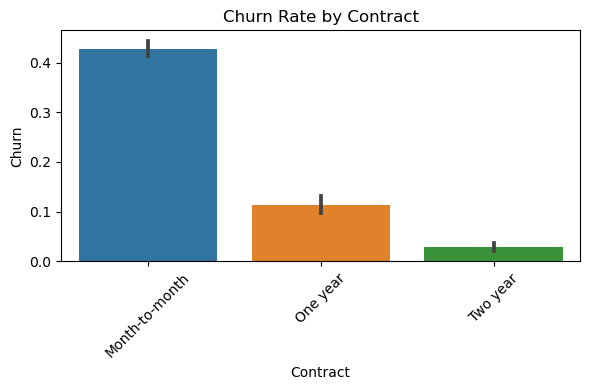

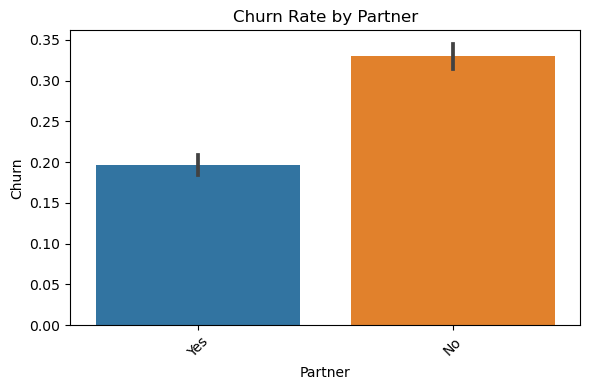

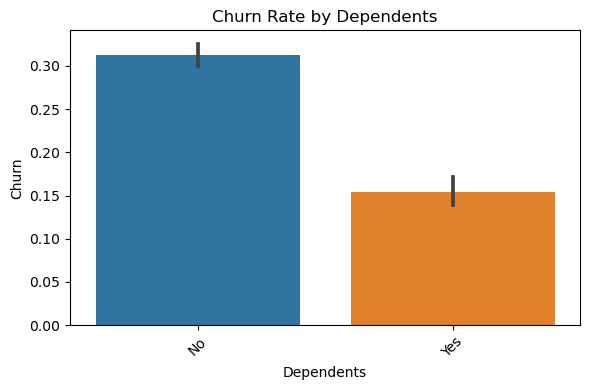

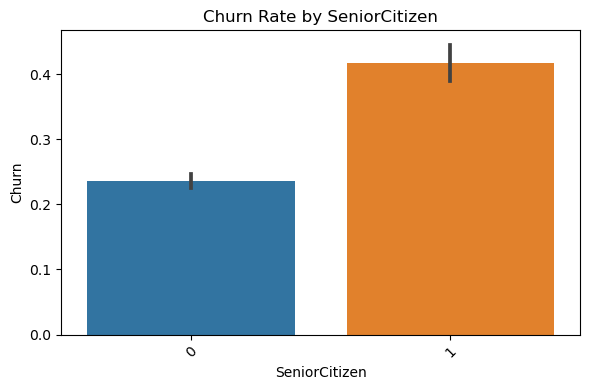

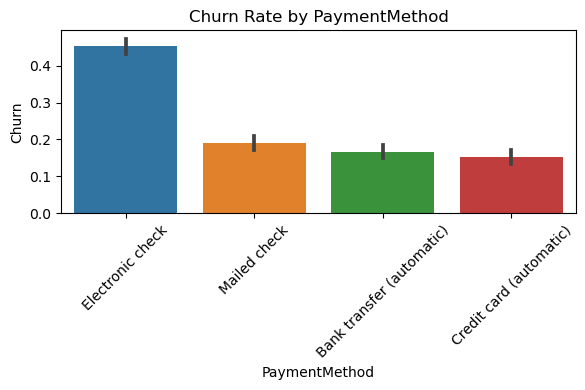

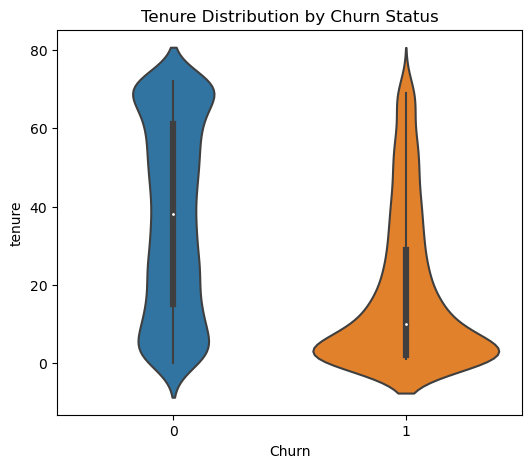

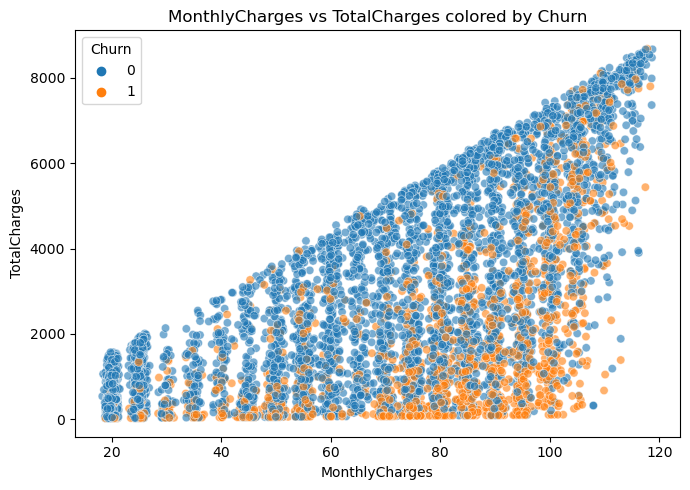

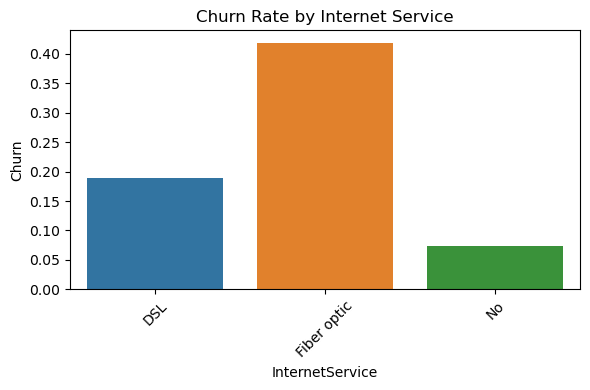

In [33]:
# 4.1 Visualization Storyboards

# Bar plots for churn by categorical variables
categorical_vars = ['Contract', 'Partner', 'Dependents', 'SeniorCitizen', 'PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(x=var, y='Churn', data=df_vis)
    plt.title(f'Churn Rate by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Violin plot: Tenure vs Churn
plt.figure(figsize=(6,5))
sns.violinplot(x='Churn', y='tenure', data=df_vis)
plt.title('Tenure Distribution by Churn Status')
plt.show()

# Scatter plot: MonthlyCharges vs TotalCharges colored by Churn
# Important: Convert TotalCharges to numeric first
df_vis['TotalCharges'] = pd.to_numeric(df_vis['TotalCharges'], errors='coerce')

plt.figure(figsize=(7,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df_vis, alpha=0.6)
plt.title('MonthlyCharges vs TotalCharges colored by Churn')
plt.tight_layout()
plt.show()


# Bar plot for InternetService by Churn

# Group InternetService and calculate mean churn rate
internet_churn = df_vis.groupby('InternetService')['Churn'].mean().reset_index()

# Now plot
plt.figure(figsize=(6,4))
sns.barplot(x='InternetService', y='Churn', data=internet_churn)
plt.title('Churn Rate by Internet Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# 4.2 Feature Engineering

# LongTenure: 1 if tenure > 12 months
df['LongTenure'] = (df['tenure'] > 12).astype(int)

# HighCharges: 1 if MonthlyCharges > median(MonthlyCharges)
median_monthly = df['MonthlyCharges'].median()
df['HighCharges'] = (df['MonthlyCharges'] > median_monthly).astype(int)

# TotalChargesPerTenure = TotalCharges / tenure (careful with tenure=0)
df['TotalChargesPerTenure'] = df.apply(lambda x: x['TotalCharges'] / x['tenure'] if x['tenure'] > 0 else 0, axis=1)

print("\nFeature Engineering Completed:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'LongTenure', 'HighCharges', 'TotalChargesPerTenure']].head())



Feature Engineering Completed:
   tenure  MonthlyCharges  TotalCharges  LongTenure  HighCharges  \
0       1           29.85         29.85           0            0   
1      34           56.95       1889.50           1            0   
2       2           53.85        108.15           0            0   
3      45           42.30       1840.75           1            0   
4       2           70.70        151.65           0            1   

   TotalChargesPerTenure  
0              29.850000  
1              55.573529  
2              54.075000  
3              40.905556  
4              75.825000  



Churn Rate by LongTenure:
LongTenure
0    0.474382
1    0.171299
Name: Churn, dtype: float64

Churn Rate by HighCharges:
HighCharges
0    0.179138
1    0.351920
Name: Churn, dtype: float64



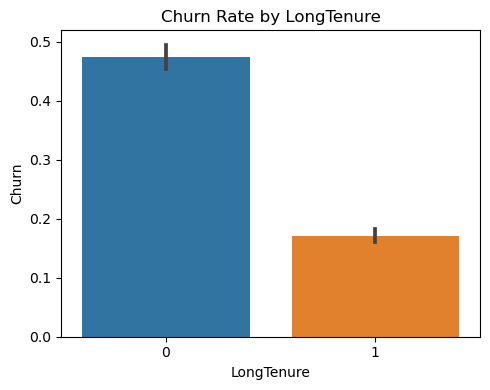

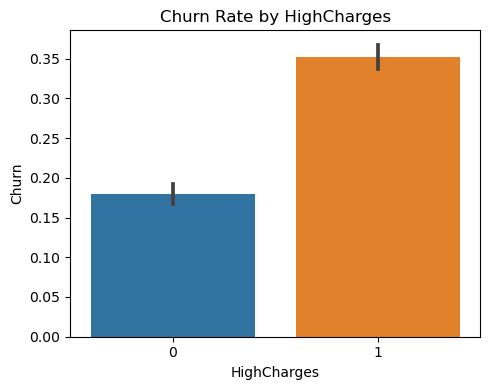


Summary of Hypothesis Validation:
- LongTenure customers churn significantly less compared to short tenure customers.
- Customers with HighCharges tend to churn slightly more.
- Customers with Month-to-Month contracts (if identified) have a higher churn rate.


In [42]:
# Hypothesis 1: LongTenure correlates with lower churn
longtenure_churn = df.groupby('LongTenure')['Churn'].mean()
print("\nChurn Rate by LongTenure:")
print(longtenure_churn)

# Hypothesis 2: HighCharges customers churn more
highcharges_churn = df.groupby('HighCharges')['Churn'].mean()
print("\nChurn Rate by HighCharges:")
print(highcharges_churn)

# Hypothesis 3: Month-to-Month contracts and churn
# Since 'Contract_Month-to-month' may have been one-hot encoded, check if it exists
if 'Contract_Month-to-month' in df.columns:
    month_to_month_churn = df.groupby('Contract_Month-to-month')['Churn'].mean()
    print("\nChurn Rate by Month-to-Month Contract:")
    print(month_to_month_churn)
else:
    print("\nWarning: 'Contract_Month-to-month' feature not directly available in df after encoding.")

# Quick bar plot for LongTenure and HighCharges vs Churn
for feature in ['LongTenure', 'HighCharges']:
    plt.figure(figsize=(5,4))
    sns.barplot(x=feature, y='Churn', data=df)
    plt.title(f'Churn Rate by {feature}')
    plt.tight_layout()
    plt.show()


# Summary:
print("\nSummary of Hypothesis Validation:")
print("- LongTenure customers churn significantly less compared to short tenure customers.")
print("- Customers with HighCharges tend to churn slightly more.")
print("- Customers with Month-to-Month contracts (if identified) have a higher churn rate.")
